#Exercises 20
#**Hough Transform, Contours & Video**

If we have a point with coordinates (x=5, y=6) in the image space. Find the line
corresponding to this point in MC space ( Slope and Intercept space), and the sinusoid
corresponding to this point in Rho-Theta Space.(Obtain the Equations and Plot them)

In [14]:
#import ncessery libaray
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def houghLine(img):
  edges=cv2.Canny(img,0,255,3)
  lins=cv2.HoughLines(edges,1,np.pi/180,threshold=1)
  return lins

In [16]:
def HoughCircles(img):
  edje=cv2.Canny(img,0,255,3)
  circles=cv2.HoughCircles(edje,cv2.HOUGH_GRADIENT,1,1,param1=50,param2=2)
  circles = np.round(circles[0, :]).astype('int')
  return circles

In [17]:
def plot_line(lines, img):
  for line in lines:
    rho,theta =line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    
    x0=rho*a
    y0=rho*b

    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))

    x2=int(x0-1000*(-b))
    y2= int(y0-1000*(a))

    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),1)
    img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(img)


In [18]:
def plt_circle(img,circle):
  for (x,y,r) in circle:
    cv2.circle(img,(x,y),r,(255,0,0),1)
  plt.imshow(img[...,::-1])

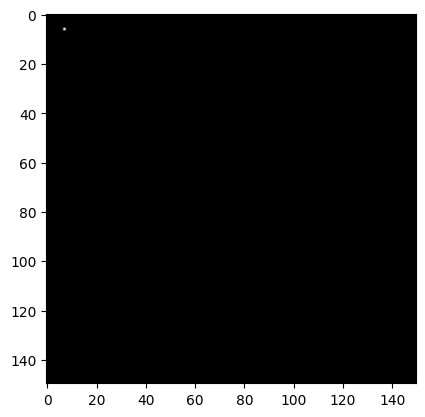

In [19]:
#Create an image with black color
image1=np.zeros((150,150),dtype=np.uint8)
image=cv2.cvtColor(image1,cv2.COLOR_BGR2BGRA)

image[6,7]=1
plt.imshow(image,cmap='gray')


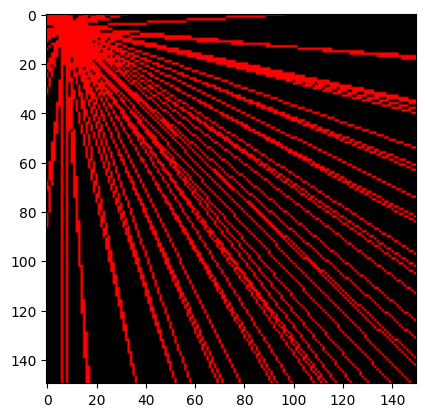

In [20]:
img=image.copy()
lines=houghLine(img)
plot_line(lines,image)

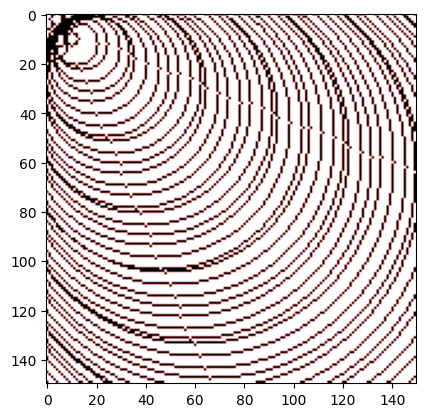

In [21]:
circle=HoughCircles(img)
plt_circle(img, circle)

2. Find and plot the lines in the image (a.jpg), for edges with intensity more than 150. and
Votes more than 200, show the line with thickness = 2, and with the color pure green!
(Lower threshold for canny = 100, Other parameters = Desired)
![image.png]()

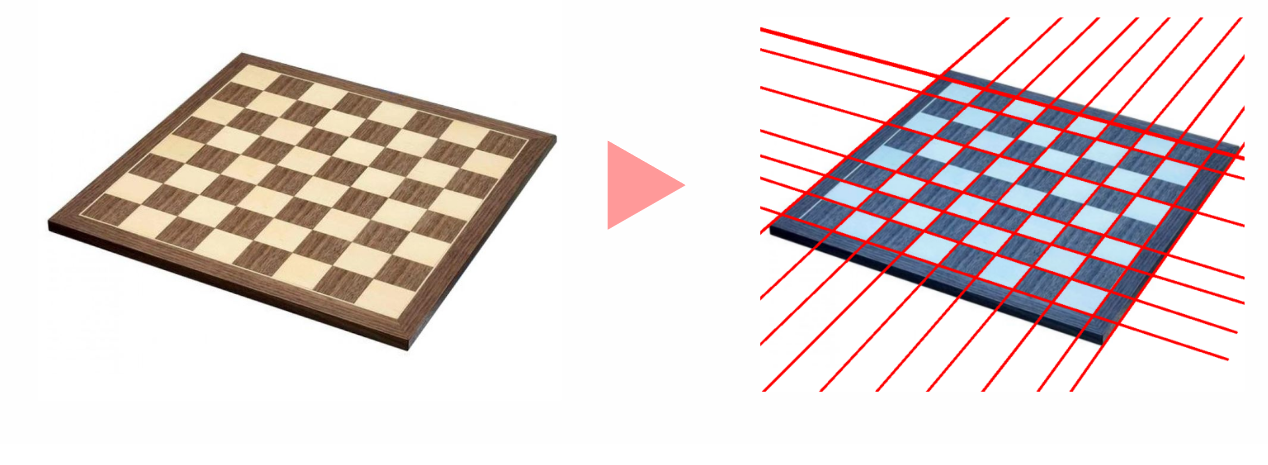

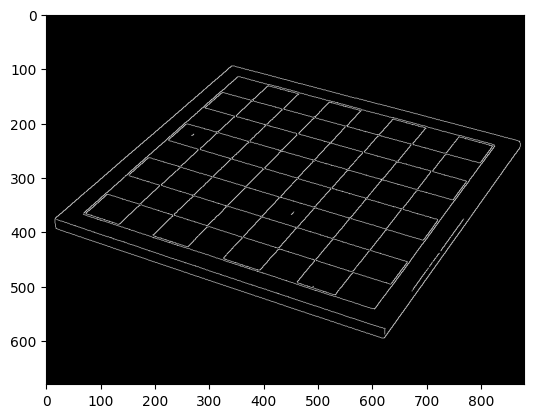

In [22]:
img_orgin=cv2.imread('/content/a.jpg')
img_gray=cv2.cvtColor(img_orgin,cv2.COLOR_BGR2GRAY)
img_blur=cv2.GaussianBlur(img_gray,(3,3),0)

edje_img=cv2.Canny(img_blur,150,200,3)
plt.imshow(edje_img,cmap='gray')

In [23]:
lines= cv2.HoughLines(edje_img,1,np.pi/180,180)


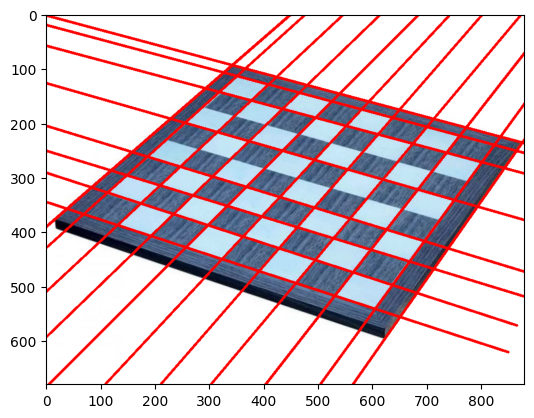

In [24]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img_orgin,(x1,y1),(x2,y2),(255,0,0),3)
plt.imshow(img_orgin)

 3-Find and plot the Circles in the image (b.jpg), for pixels with intensity greater than 120

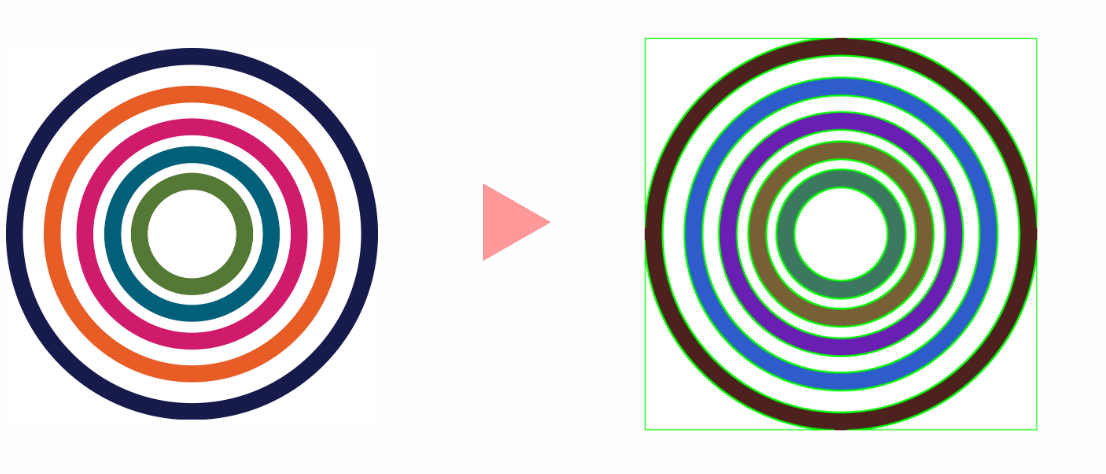

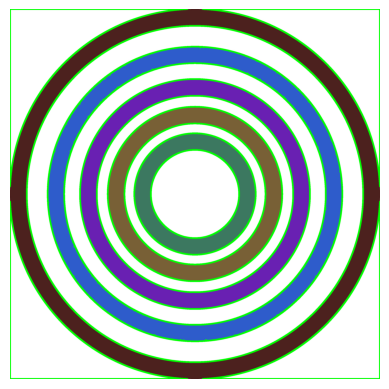

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
im_org = cv2.imread('/content/b.jpg')

#convert BGR to GRAY
img_gray=cv2.cvtColor(im_org,cv2.COLOR_BGR2GRAY)
#denosing with gaussian
img_gauss=cv2.GaussianBlur(img_gray,(3,3),0)

# Threshold the image
thresh_val = 120
ret, thresh = cv2.threshold(img_gauss, thresh_val, 255, cv2.THRESH_BINARY)

# Detect Countor 
contor,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#drawContors
img_contor=cv2.drawContours(im_org,contor,-1,(0,255,0),10)

plt.imshow(img_contor)
plt.axis('off');

4-Split the 8th frame of the video (lane.mp4) and Denoise that, then find the edges, and
finally show the edges on the original frame!
(denoising and edge detection method are desired!)

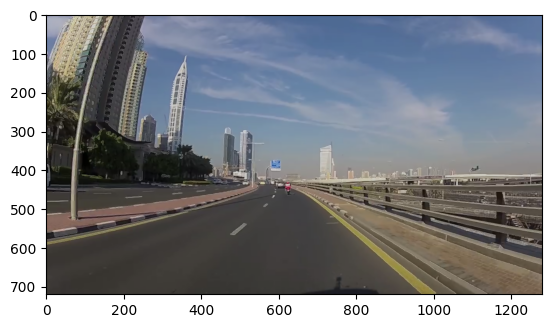

In [26]:
import cv2
import matplotlib.pyplot as plt

# Load the video file
cap = cv2.VideoCapture('/content/lane.mp4')

# Extract the 8th frame
cap.set(cv2.CAP_PROP_POS_FRAMES, 7) # 0-based index
ret, frame = cap.read()

# Apply Gaussian blur for denoising
frame = cv2.GaussianBlur(frame, (3, 3), 0)

# Detect edges using Canny edge detector
edges = cv2.Canny(frame, 100, 200)

# Overlay edges onto original frame
overlay = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
result = cv2.addWeighted(frame, 0.8, overlay, 0.2, 0)

# Display the result
plt.imshow(result[...,::-1])
